In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import requests
import pandas as pd

In [ ]:

lat, lon = 41.0082, 28.9784
start_date = "2022-01-01"
end_date = "2022-12-31"


In [ ]:
url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum,weathercode&timezone=Europe/Istanbul"

In [ ]:
response = requests.get(url)
data = response.json()

In [ ]:
# Günlük veriyi DataFrame'e çevir
df = pd.DataFrame({
    'Tarih': data['daily']['time'],
    'temp_max': data['daily']['temperature_2m_max'],
    'temp_min': data['daily']['temperature_2m_min'],
    'precipitation': data['daily']['precipitation_sum'],
    'weathercode': data['daily']['weathercode']
})


In [ ]:
from google.colab import files

output_path = "/content/drive/MyDrive/Data Analyts Project/2022havadurumu.xlsx"
df.to_excel(output_path, index=False)

output_path

'/content/drive/MyDrive/Data Analyts Project/2022havadurumu.xlsx'

In [ ]:
import pandas as pd

# Eğer daha önce kaydettiysen:
file_path = "/content/drive/MyDrive/Data Analyts Project/2022havadurumu.xlsx"
df = pd.read_excel(file_path)

Temiz / temiz değil sınıflandırması

In [ ]:
def classify_weather(row):
    if row['precipitation'] > 0 or row['weathercode'] in [71, 73, 75, 77]:
        return 0  # temiz değil
    else:
        return 1  # temiz

df['Hava Temiz'] = df.apply(classify_weather, axis=1)

In [ ]:
output_path = "/content/drive/MyDrive/Data Analyts Project/YagmurKarTemizHavaDUrumu.xlsx"
df.to_excel(output_path, index=False)

output_path

'/content/drive/MyDrive/Data Analyts Project/YagmurKarTemizHavaDUrumu.xlsx'

In [ ]:
file_path = "/content/drive/MyDrive/Data Analyts Project/YagmurKarTemizHavaDUrumu.xlsx"
df = pd.read_excel(file_path)
df.head()

,Tarih,temp_max,temp_min,precipitation,weathercode,Hava Temiz
0,2022-01-01,9.4,5.5,1.8,53,0
1,2022-01-02,11.8,5.2,0.9,51,0
2,2022-01-03,11.4,4.2,0.0,3,1
3,2022-01-04,12.6,7.6,0.0,3,1
4,2022-01-05,15.1,10.6,0.0,2,1


In [ ]:
filtered_df = df[["Tarih", "Hava Temiz"]]
filtered_df["Tarih"] = pd.to_datetime(filtered_df["Tarih"])
filtered_df = filtered_df.sort_values("Tarih", ascending=True)
filtered_df.head()

/tmp/ipython-input-2090781696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Tarih"] = pd.to_datetime(filtered_df["Tarih"])


,Tarih,Hava Temiz
0,2022-01-01,0
1,2022-01-02,0
2,2022-01-03,1
3,2022-01-04,1
4,2022-01-05,1


In [ ]:
output_path = "/content/drive/MyDrive/Data Analyts Project/TarihVeHavaTemiz.xlsx"
filtered_df.to_excel(output_path, index=False)

output_path

'/content/drive/MyDrive/Data Analyts Project/TarihVeHavaTemiz.xlsx'

**ŞİMDİ AKARYAKIT FİYATI VE HAVA DURUMU ARAÇ TOPLAMI ETKİLEYECEK Mİ DİYE MULTİPLE LİNEAR REGRESSİON**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
file_path = "/content/drive/MyDrive/Data Analyts Project/sensor_288_temizlenmis.xlsx"
trafik_df = pd.read_excel(file_path)
file_path ="/content/drive/MyDrive/Data Analyts Project/Akaryakit_temizlenmis1.xlsx"
yakit_df = pd.read_excel(file_path)
file_path ="/content/drive/MyDrive/Data Analyts Project/TarihVeHavaTemiz.xlsx"
hava_df = pd.read_excel(file_path)

In [ ]:
# Tarih sutunleri datetime formatina cevir cunku 3 dosyada tarihler farkli tipi oldugu icin
trafik_df["Tarih"] = pd.to_datetime(trafik_df["Tarih"])
yakit_df["Tarih"] = pd.to_datetime(yakit_df["Tarih"])
hava_df["Tarih"] =pd.to_datetime(hava_df["Tarih"])
# birleştirme yap
df_temp = pd.merge(trafik_df, yakit_df, on="Tarih")



In [ ]:
df = pd.merge(df_temp, hava_df, on="Tarih")

Bu yöntemle istediğin kadar DataFrame’i tek satırda birleştirebilirsin.

In [ ]:
from functools import reduce

dfs = [trafik_df, yakit_df, hava_df]
df = reduce(lambda left, right: pd.merge(left, right, on="Tarih"), dfs)

In [ ]:
output_path = "/content/drive/MyDrive/Data Analyts Project/Merge3İnfo.xlsx"
df.to_excel(output_path, index=False)
output_path

'/content/drive/MyDrive/Data Analyts Project/Merge3İnfo.xlsx'

In [ ]:
# V/Max Kurşunsuz 95 sadece sayısal al
df["V/Max Kurşunsuz 95"] = df["V/Max Kurşunsuz 95"].astype(str).str.replace(" TL/LT", "")
df["V/Max Kurşunsuz 95"] = df["V/Max Kurşunsuz 95"].astype(float)
X = df[['V/Max Kurşunsuz 95', 'Hava Temiz']]  # bağımsız değişkenler
y = df['ARAC TOPLAM']    # bağımlı değişken

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
y_pred = model.predict(X)
print("Eğim (slope):", model.coef_[0])
print("Y-kesişim (intercept):", model.intercept_)
print("R-kare (R²) değeri:", model.score(X, y))


Eğim (slope): 539.4748350212299
Y-kesişim (intercept): 86571.49269291475
R-kare (R²) değeri: 0.07033778582916617


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y, y_pred)   # sadece MSE var
rmse = np.sqrt(mse)                   # karekökünü al
print("RMSE:", rmse)

RMSE: 8970.211034061364


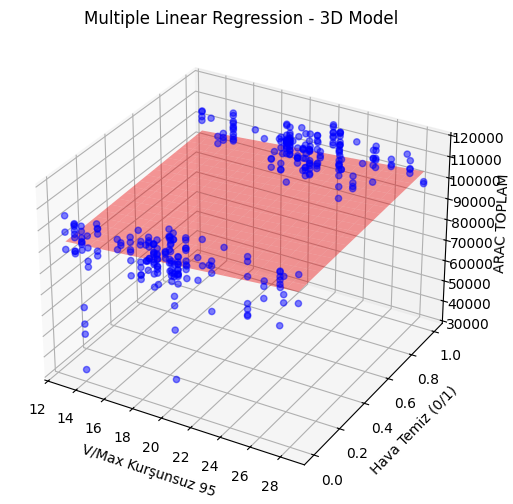

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# X1 = fuel_price, X2 = clean_weather
x_surf, y_surf = np.meshgrid(np.linspace(X['V/Max Kurşunsuz 95'].min(), X['V/Max Kurşunsuz 95'].max(), 20),
                             np.linspace(X['Hava Temiz'].min(), X['Hava Temiz'].max(), 20))
z_pred = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf

# Gerçek veriyi scatter ile çiz
ax.scatter(X['V/Max Kurşunsuz 95'], X['Hava Temiz'], y, c='blue', marker='o', alpha=0.5, label="Gerçek")

# Regresyon düzlemi
ax.plot_surface(x_surf, y_surf, z_pred, color='red', alpha=0.4)

ax.set_xlabel('V/Max Kurşunsuz 95')
ax.set_ylabel('Hava Temiz (0/1)')
ax.set_zlabel('ARAC TOPLAM')
ax.set_title("Multiple Linear Regression - 3D Model")

plt.show()

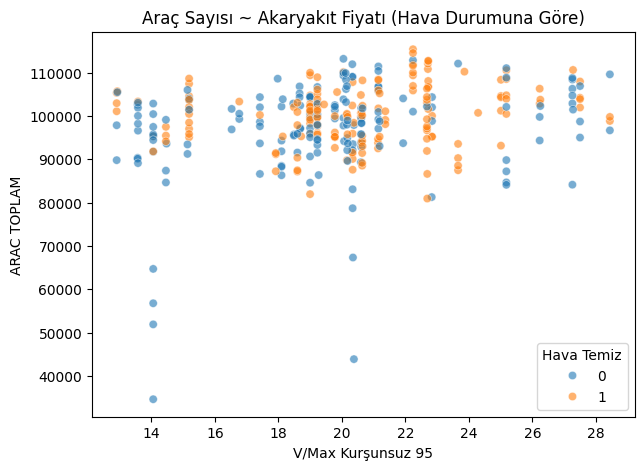

In [ ]:
import seaborn as sns

# Fuel price ~ Araç sayısı (renklendirme: hava durumu)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="V/Max Kurşunsuz 95", y="ARAC TOPLAM", hue="Hava Temiz", alpha=0.6)
plt.title("Araç Sayısı ~ Akaryakıt Fiyatı (Hava Durumuna Göre)")
plt.show()